In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f'{year}年{month}月')

2020年4月


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']




In [5]:

join_counts=[conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]]
percents=[]
for i in range(1,month-6+1):
    sql=f"select COUNT(1) from _{year}{month:02} a join _{year}{month-i:02} b on a.job_id = b.job_id"
    #print(sql)
    count=conn.execute(sql).fetchall()[0][0]

    join_counts.append(count)
    subtract = join_counts[i-1]-join_counts[i]
    percents.append(subtract*1.0/join_counts[i])

percents.append(join_counts[-1]/join_counts[0])

In [6]:
join_counts

[68839]

In [7]:
percents

[1.0]

In [9]:
#plt.pie(percents, labels=['1','2','3','4','5','6','7','7+'])
#plt.show()

In [10]:
data.shape[0]

64772

In [11]:
conn.close()

In [12]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [13]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
22,光学算法工程师,28611,24500,26214,40000,9,0.00%
5,CT重建,26000,19500,27500,30000,7,0.00%
2,系统架构师,22972,6250,21500,47500,8589,3.89%
17,规划算法工程师,22190,10501,20000,37500,51,0.02%
3,机器学习,21868,5250,20000,50000,3594,1.63%
23,adas,20908,9000,21500,37500,69,0.03%
8,SLAM,20102,4896,19166,41107,618,0.28%
7,图像算法,18849,5125,17500,40625,1005,0.46%
12,FPGA,18116,7000,16000,37009,435,0.20%
9,算法工程师,17411,5250,15000,40000,8603,3.90%


# 程序员工资

In [14]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,18884,3750,17000,45000,18359,8.32%
上海,17173,5250,15000,40000,34758,15.75%
广东,15164,4750,13000,35000,54944,24.90%
浙江,13470,3750,12500,35000,17127,7.76%
四川,12409,3750,11500,30000,9826,4.45%
江苏,12212,3750,11500,27500,24617,11.16%
湖北,11959,3750,11000,27083,9550,4.33%
陕西,11770,3750,11000,27500,6509,2.95%
湖南,11693,3906,11000,25000,4785,2.17%
重庆,11316,3750,9514,35000,2912,1.32%


In [15]:
describe(data_city,'程序员')

2020年4月北京招收程序员18359人。2019年4月北京程序员平均工资18884元，工资中位数17000元，其中95%的人的工资介于3750元到45000元。

2020年4月上海招收程序员34758人。2019年4月上海程序员平均工资17173元，工资中位数15000元，其中95%的人的工资介于5250元到40000元。

2020年4月广东招收程序员54944人。2019年4月广东程序员平均工资15164元，工资中位数13000元，其中95%的人的工资介于4750元到35000元。

2020年4月浙江招收程序员17127人。2019年4月浙江程序员平均工资13470元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。

2020年4月四川招收程序员9826人。2019年4月四川程序员平均工资12409元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年4月江苏招收程序员24617人。2019年4月江苏程序员平均工资12212元，工资中位数11500元，其中95%的人的工资介于3750元到27500元。

2020年4月湖北招收程序员9550人。2019年4月湖北程序员平均工资11959元，工资中位数11000元，其中95%的人的工资介于3750元到27083元。

2020年4月陕西招收程序员6509人。2019年4月陕西程序员平均工资11770元，工资中位数11000元，其中95%的人的工资介于3750元到27500元。

2020年4月湖南招收程序员4785人。2019年4月湖南程序员平均工资11693元，工资中位数11000元，其中95%的人的工资介于3906元到25000元。

2020年4月重庆招收程序员2912人。2019年4月重庆程序员平均工资11316元，工资中位数9514元，其中95%的人的工资介于3750元到35000元。

2020年4月天津招收程序员1794人。2019年4月天津程序员平均工资11263元，工资中位数10000元，其中95%的人的工资介于5000元到24000元。

2020年4月辽宁招收程序员9795人。2019年4月辽宁程序员平均工资11138元，工资中位数9000元，其中95%的人的工资介于2916元到32500元。

2020年4月福建招收程序

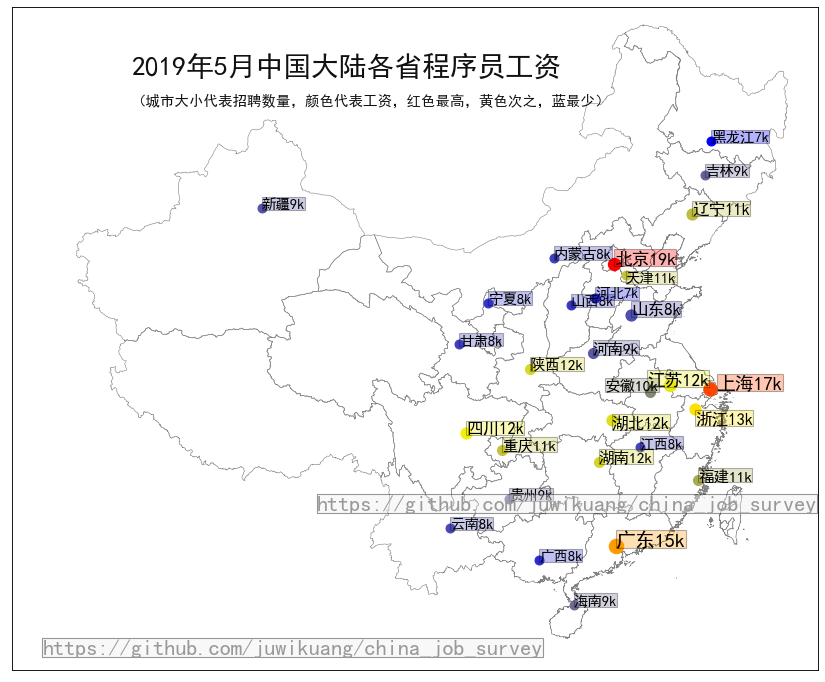

In [16]:
draw_province_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [17]:
describe(get_sub_stats_by_col(data[data.career=='算法工程师'],'province'), '算法工程师')

2020年4月北京招收算法工程师1101人。2019年4月北京算法工程师平均工资21165元，工资中位数18929元，其中95%的人的工资介于7000元到40000元。

2020年4月上海招收算法工程师1650人。2019年4月上海算法工程师平均工资20167元，工资中位数17500元，其中95%的人的工资介于7000元到40000元。

2020年4月浙江招收算法工程师559人。2019年4月浙江算法工程师平均工资19916元，工资中位数17500元，其中95%的人的工资介于3928元到45587元。

2020年4月广东招收算法工程师2227人。2019年4月广东算法工程师平均工资19001元，工资中位数17500元，其中95%的人的工资介于6000元到45000元。

2020年4月湖北招收算法工程师265人。2019年4月湖北算法工程师平均工资15116元，工资中位数15000元，其中95%的人的工资介于4988元到27721元。

2020年4月天津招收算法工程师64人。2019年4月天津算法工程师平均工资15031元，工资中位数14438元，其中95%的人的工资介于8000元到23962元。

2020年4月江苏招收算法工程师1073人。2019年4月江苏算法工程师平均工资14226元，工资中位数12500元，其中95%的人的工资介于4500元到30000元。

2020年4月福建招收算法工程师73人。2019年4月福建算法工程师平均工资13774元，工资中位数12500元，其中95%的人的工资介于4000元到23625元。

2020年4月陕西招收算法工程师282人。2019年4月陕西算法工程师平均工资13176元，工资中位数12500元，其中95%的人的工资介于4200元到26663元。

2020年4月湖南招收算法工程师155人。2019年4月湖南算法工程师平均工资13000元，工资中位数12500元，其中95%的人的工资介于6688元到23396元。

2020年4月四川招收算法工程师473人。2019年4月四川算法工程师平均工资12706元，工资中位数11500元，其中95%的人的工资介于5682元到29632元。

2020年4月重庆招收算法工程师77人。2019年4月重庆算法工程师平均工资12238元，工资中位数11500元，其中95%的

In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,21165,7000,18929,40000,1101,12.80%
上海,20167,7000,17500,40000,1650,19.18%
浙江,19916,3928,17500,45587,559,6.50%
广东,19001,6000,17500,45000,2227,25.89%
湖北,15116,4988,15000,27721,265,3.08%
天津,15031,8000,14438,23962,64,0.74%
江苏,14226,4500,12500,30000,1073,12.47%
福建,13774,4000,12500,23625,73,0.85%
陕西,13176,4200,12500,26663,282,3.28%
湖南,13000,6688,12500,23396,155,1.80%


In [19]:
describe(data_city_algorithm,'算法工程师')

2020年4月北京招收算法工程师1101人。2019年4月北京算法工程师平均工资21165元，工资中位数18929元，其中95%的人的工资介于7000元到40000元。

2020年4月上海招收算法工程师1650人。2019年4月上海算法工程师平均工资20167元，工资中位数17500元，其中95%的人的工资介于7000元到40000元。

2020年4月浙江招收算法工程师559人。2019年4月浙江算法工程师平均工资19916元，工资中位数17500元，其中95%的人的工资介于3928元到45587元。

2020年4月广东招收算法工程师2227人。2019年4月广东算法工程师平均工资19001元，工资中位数17500元，其中95%的人的工资介于6000元到45000元。

2020年4月湖北招收算法工程师265人。2019年4月湖北算法工程师平均工资15116元，工资中位数15000元，其中95%的人的工资介于4988元到27721元。

2020年4月天津招收算法工程师64人。2019年4月天津算法工程师平均工资15031元，工资中位数14438元，其中95%的人的工资介于8000元到23962元。

2020年4月江苏招收算法工程师1073人。2019年4月江苏算法工程师平均工资14226元，工资中位数12500元，其中95%的人的工资介于4500元到30000元。

2020年4月福建招收算法工程师73人。2019年4月福建算法工程师平均工资13774元，工资中位数12500元，其中95%的人的工资介于4000元到23625元。

2020年4月陕西招收算法工程师282人。2019年4月陕西算法工程师平均工资13176元，工资中位数12500元，其中95%的人的工资介于4200元到26663元。

2020年4月湖南招收算法工程师155人。2019年4月湖南算法工程师平均工资13000元，工资中位数12500元，其中95%的人的工资介于6688元到23396元。

2020年4月四川招收算法工程师473人。2019年4月四川算法工程师平均工资12706元，工资中位数11500元，其中95%的人的工资介于5682元到29632元。

2020年4月重庆招收算法工程师77人。2019年4月重庆算法工程师平均工资12238元，工资中位数11500元，其中95%的

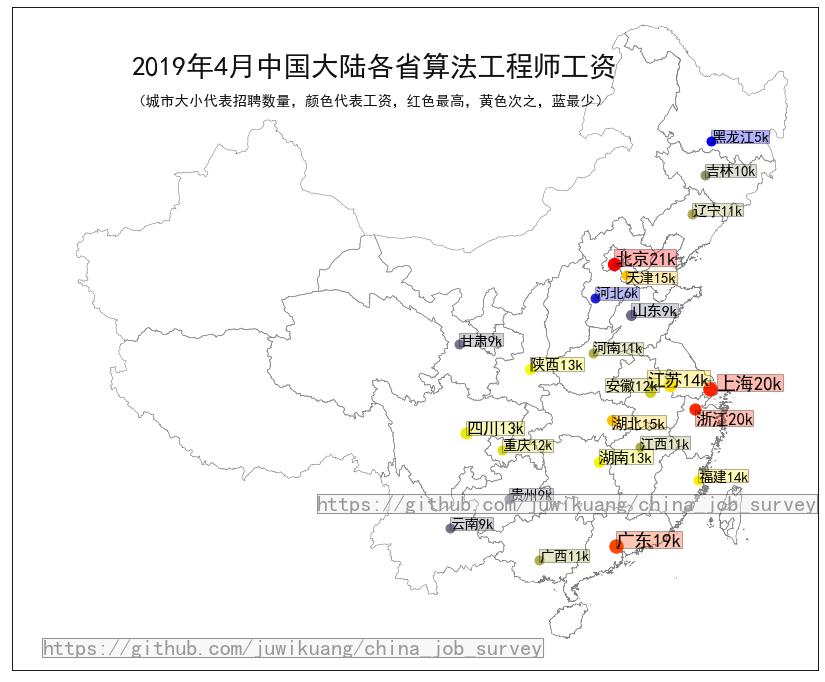

In [20]:
draw_province_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [21]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,30519,11450,30000,55000,1275,14.84%
河北,25389,6500,13100,75000,9,0.10%
上海,25224,7000,22500,54166,1741,20.27%
浙江,25027,6686,25000,46286,572,6.66%
广东,23494,6971,22500,46000,2552,29.71%
四川,19033,3863,17500,45528,226,2.63%
江苏,18489,5370,17500,35000,676,7.87%
湖北,17310,7000,17500,32500,291,3.39%
湖南,17198,9000,17500,34375,150,1.75%
广西,16759,10500,12500,45833,9,0.10%


In [22]:
describe(data_city_architect,'系统架构师')

2020年4月北京招收系统架构师1275人。2019年4月北京系统架构师平均工资30519元，工资中位数30000元，其中95%的人的工资介于11450元到55000元。

2020年4月河北招收系统架构师9人。2019年4月河北系统架构师平均工资25389元，工资中位数13100元，其中95%的人的工资介于6500元到75000元。

2020年4月上海招收系统架构师1741人。2019年4月上海系统架构师平均工资25224元，工资中位数22500元，其中95%的人的工资介于7000元到54166元。

2020年4月浙江招收系统架构师572人。2019年4月浙江系统架构师平均工资25027元，工资中位数25000元，其中95%的人的工资介于6686元到46286元。

2020年4月广东招收系统架构师2552人。2019年4月广东系统架构师平均工资23494元，工资中位数22500元，其中95%的人的工资介于6971元到46000元。

2020年4月四川招收系统架构师226人。2019年4月四川系统架构师平均工资19033元，工资中位数17500元，其中95%的人的工资介于3863元到45528元。

2020年4月江苏招收系统架构师676人。2019年4月江苏系统架构师平均工资18489元，工资中位数17500元，其中95%的人的工资介于5370元到35000元。

2020年4月湖北招收系统架构师291人。2019年4月湖北系统架构师平均工资17310元，工资中位数17500元，其中95%的人的工资介于7000元到32500元。

2020年4月湖南招收系统架构师150人。2019年4月湖南系统架构师平均工资17198元，工资中位数17500元，其中95%的人的工资介于9000元到34375元。

2020年4月广西招收系统架构师9人。2019年4月广西系统架构师平均工资16759元，工资中位数12500元，其中95%的人的工资介于10500元到45833元。

2020年4月陕西招收系统架构师272人。2019年4月陕西系统架构师平均工资16566元，工资中位数16000元，其中95%的人的工资介于6138元到42833元。

2020年4月福建招收系统架构师129人。2019年4月福建系统架构师平均工资15837元，工资中位数15000元，其中95%的

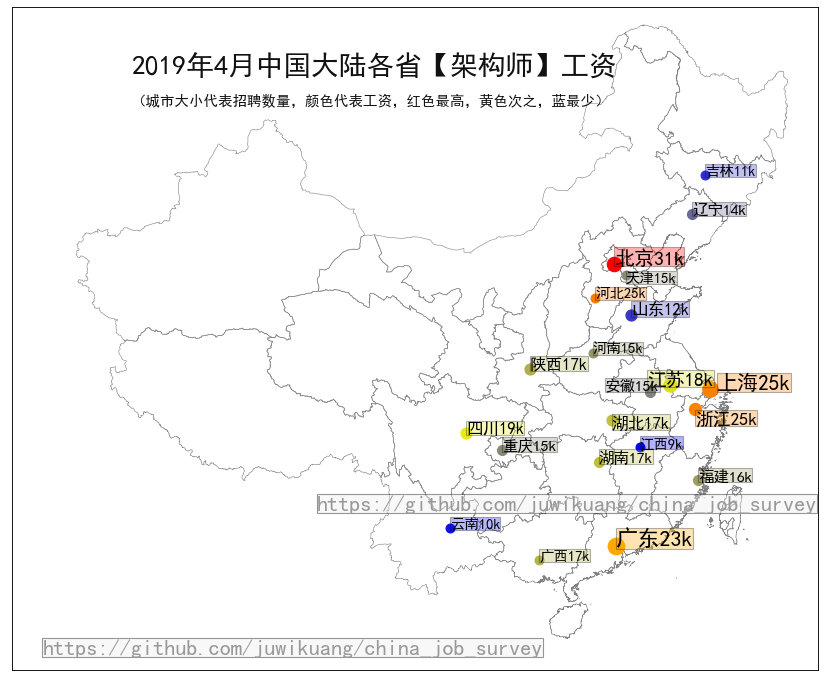

In [23]:
draw_province_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [24]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,15000,15000,15000,15000,5,14.71%
浙江,13750,11500,13750,16000,2,5.88%
湖南,13750,12500,12500,17500,4,11.76%
天津,12500,12500,12500,12500,1,2.94%
广东,11375,7000,11375,14000,8,23.53%
江苏,9875,9000,9875,12500,4,11.76%
上海,9000,7000,8000,12500,7,20.59%
广西,7000,7000,7000,7000,3,8.82%


In [25]:
describe(data_bio,'生物信息工程师')

2020年4月北京招收生物信息工程师5人。2019年4月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年4月浙江招收生物信息工程师2人。2019年4月浙江生物信息工程师平均工资13750元，工资中位数13750元，其中95%的人的工资介于11500元到16000元。

2020年4月湖南招收生物信息工程师4人。2019年4月湖南生物信息工程师平均工资13750元，工资中位数12500元，其中95%的人的工资介于12500元到17500元。

2020年4月天津招收生物信息工程师1人。2019年4月天津生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年4月广东招收生物信息工程师8人。2019年4月广东生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2020年4月江苏招收生物信息工程师4人。2019年4月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2020年4月上海招收生物信息工程师7人。2019年4月上海生物信息工程师平均工资9000元，工资中位数8000元，其中95%的人的工资介于7000元到12500元。

2020年4月广西招收生物信息工程师3人。2019年4月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



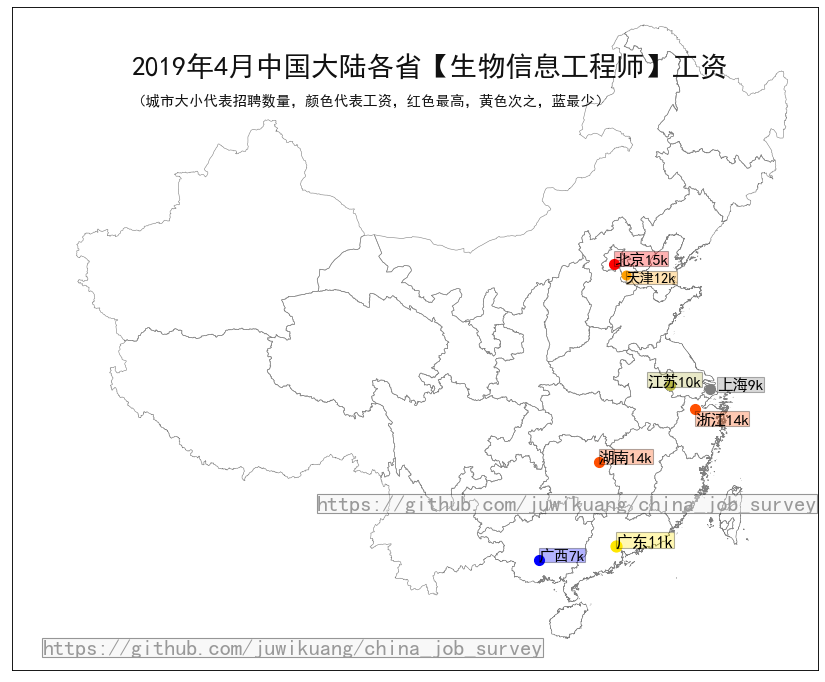

In [26]:
draw_province_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [27]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,14969,3750,14000,33500,32,11.07%
江苏,13648,7000,13000,20000,27,9.34%
北京,13262,3750,12500,20000,41,14.19%
广东,13090,1750,12500,22100,92,31.83%
湖北,12375,8500,11500,20000,12,4.15%
湖南,9000,7000,7800,12500,14,4.84%
四川,7620,6010,6850,11500,25,8.65%


In [28]:
describe(data_spider, '爬虫工程师')

2020年4月上海招收爬虫工程师32人。2019年4月上海爬虫工程师平均工资14969元，工资中位数14000元，其中95%的人的工资介于3750元到33500元。

2020年4月江苏招收爬虫工程师27人。2019年4月江苏爬虫工程师平均工资13648元，工资中位数13000元，其中95%的人的工资介于7000元到20000元。

2020年4月北京招收爬虫工程师41人。2019年4月北京爬虫工程师平均工资13262元，工资中位数12500元，其中95%的人的工资介于3750元到20000元。

2020年4月广东招收爬虫工程师92人。2019年4月广东爬虫工程师平均工资13090元，工资中位数12500元，其中95%的人的工资介于1750元到22100元。

2020年4月湖北招收爬虫工程师12人。2019年4月湖北爬虫工程师平均工资12375元，工资中位数11500元，其中95%的人的工资介于8500元到20000元。

2020年4月湖南招收爬虫工程师14人。2019年4月湖南爬虫工程师平均工资9000元，工资中位数7800元，其中95%的人的工资介于7000元到12500元。

2020年4月四川招收爬虫工程师25人。2019年4月四川爬虫工程师平均工资7620元，工资中位数6850元，其中95%的人的工资介于6010元到11500元。



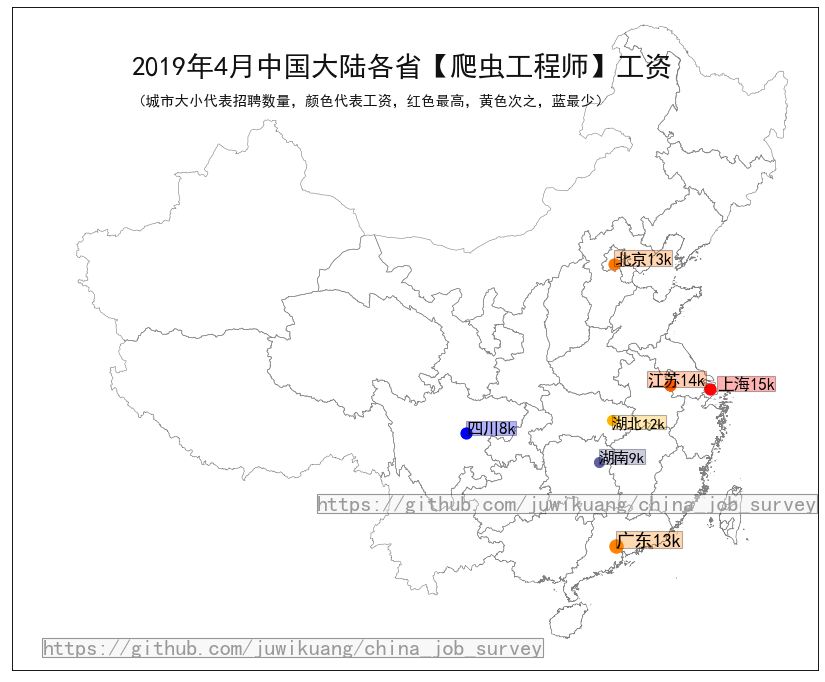

In [29]:
draw_province_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [30]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17623,4500,15000,42308,8253,8.56%
上海,17095,6000,15000,37500,14824,15.38%
广东,15061,4000,13333,35000,23210,24.08%
浙江,14533,3750,12500,35438,6493,6.74%
江苏,11847,3750,11000,27000,10786,11.19%
四川,11758,3500,11000,27039,3706,3.84%
湖北,11694,5000,10500,26000,3771,3.91%
陕西,11617,3750,11000,25000,2922,3.03%
辽宁,11548,2500,9000,32500,5345,5.55%
重庆,11531,3574,10000,39585,1412,1.46%


In [31]:
describe(data_java, 'Java程序员')

2020年4月北京招收Java程序员8253人。2019年4月北京Java程序员平均工资17623元，工资中位数15000元，其中95%的人的工资介于4500元到42308元。

2020年4月上海招收Java程序员14824人。2019年4月上海Java程序员平均工资17095元，工资中位数15000元，其中95%的人的工资介于6000元到37500元。

2020年4月广东招收Java程序员23210人。2019年4月广东Java程序员平均工资15061元，工资中位数13333元，其中95%的人的工资介于4000元到35000元。

2020年4月浙江招收Java程序员6493人。2019年4月浙江Java程序员平均工资14533元，工资中位数12500元，其中95%的人的工资介于3750元到35438元。

2020年4月江苏招收Java程序员10786人。2019年4月江苏Java程序员平均工资11847元，工资中位数11000元，其中95%的人的工资介于3750元到27000元。

2020年4月四川招收Java程序员3706人。2019年4月四川Java程序员平均工资11758元，工资中位数11000元，其中95%的人的工资介于3500元到27039元。

2020年4月湖北招收Java程序员3771人。2019年4月湖北Java程序员平均工资11694元，工资中位数10500元，其中95%的人的工资介于5000元到26000元。

2020年4月陕西招收Java程序员2922人。2019年4月陕西Java程序员平均工资11617元，工资中位数11000元，其中95%的人的工资介于3750元到25000元。

2020年4月辽宁招收Java程序员5345人。2019年4月辽宁Java程序员平均工资11548元，工资中位数9000元，其中95%的人的工资介于2500元到32500元。

2020年4月重庆招收Java程序员1412人。2019年4月重庆Java程序员平均工资11531元，工资中位数10000元，其中95%的人的工资介于3574元到39585元。

2020年4月湖南招收Java程序员2220人。2019年4月湖南Java程序员平均工资11100元，工资中位数10500元，其中95%的人的工资介于3136元到25000元。

2020年4月吉

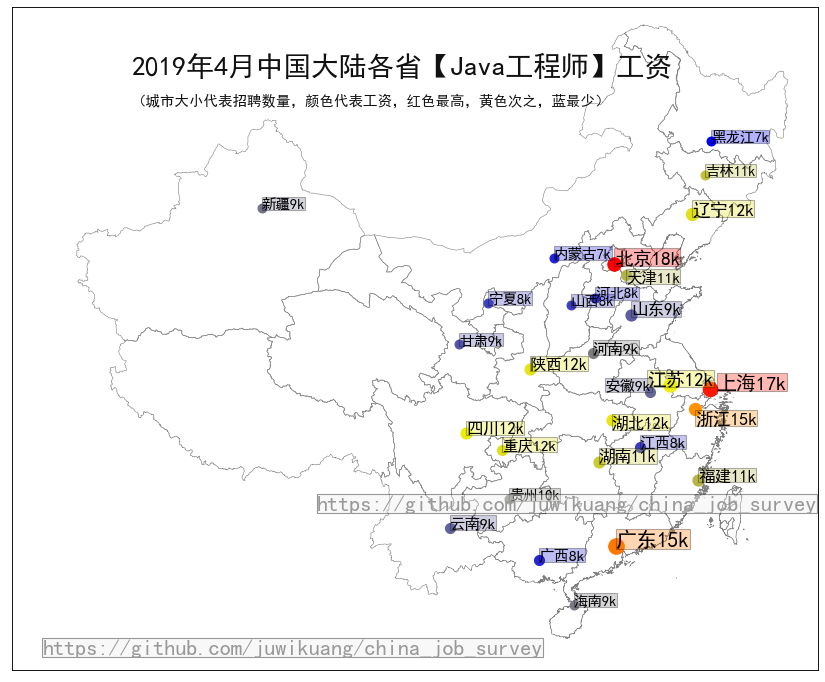

In [32]:
draw_province_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [33]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,24143,6000,22500,45000,3888,14.65%
上海,21549,6500,20000,45000,5141,19.37%
浙江,19298,3750,17500,45000,1695,6.39%
广东,18510,5000,16500,42500,6534,24.61%
重庆,18140,4732,12083,42500,302,1.14%
四川,15787,3750,14000,35412,1122,4.23%
湖北,15054,5080,12500,37652,776,2.92%
湖南,14780,5713,12500,30896,557,2.10%
陕西,14706,3645,14333,34990,821,3.09%
江苏,14151,3800,12500,30000,2807,10.57%


In [34]:
#describe(data_python, 'Python程序员')

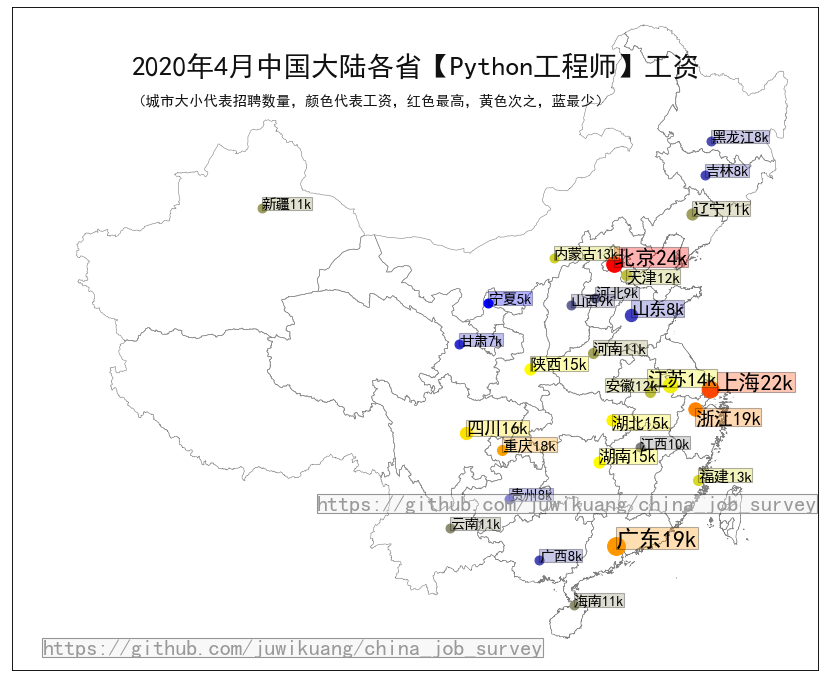

In [35]:
draw_province_map(data_python, 100,  f'{year}年{month}月中国大陆各省【Python工程师】工资')